#### 1.1 Tensor Operations:

(i) Write a program to create a variable with a size of 2x3 and a constant:

In [1]:
import tensorflow as tf

# Create a TensorFlow variable with a size of 2x3
tf_variable = tf.Variable([[1, 2, 3], [4, 5, 6]])

# Create a TensorFlow constant with the same size
tf_constant = tf.constant([[1, 1, 1], [1, 1, 1]])

# Display the variables
print("TensorFlow Variable:")
print(tf_variable.numpy())
print("TensorFlow Constant:")
print(tf_constant.numpy())

TensorFlow Variable:
[[1 2 3]
 [4 5 6]]
TensorFlow Constant:
[[1 1 1]
 [1 1 1]]


#### (ii) Write a program to create a variable "tf3" with a size 3x3 and convert it to a numpy size of 3x3. Display the rank of the matrix:

In [2]:
import tensorflow as tf
import numpy as np

# Create a TensorFlow variable with a size of 3x3
tf3 = tf.Variable([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Convert the TensorFlow variable to a NumPy array
numpy_array = tf3.numpy()

# Calculate and display the rank of the matrix
rank = np.linalg.matrix_rank(numpy_array)
print("NumPy Array:")
print(numpy_array)
print("Matrix Rank:", rank)

NumPy Array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Matrix Rank: 2


#### (iii) Write a program to randomly generate a 3x3 matrix and assign 0 to the first row's first column element:

In [3]:
import tensorflow as tf
import numpy as np

# Randomly generate a 3x3 matrix
random_matrix = tf.random.uniform(shape=(3, 3))

# Assign 0 to the first row's first column element
random_matrix = tf.tensor_scatter_nd_update(random_matrix, indices=[[0, 0]], updates=[0.0])

# Convert the TensorFlow tensor to a NumPy array
numpy_array = random_matrix.numpy()

# Display the modified matrix
print("Modified NumPy Array:")
print(numpy_array)

Modified NumPy Array:
[[0.         0.41750276 0.08787942]
 [0.34094656 0.50934196 0.9526433 ]
 [0.774299   0.92161417 0.7541418 ]]


#### 1.2 Questions on Tensor Operations:

#### (i) What is Cross Entropy?

Definition: Cross entropy is a mathematical measure used to quantify the dissimilarity or difference between two probability distributions. It is commonly applied in various fields, including machine learning and statistics.

Formula: The formula for cross entropy, denoted as H(p, q), is expressed as:

H(p, q) = -∑(p(x) * log(q(x)))

Where:

H(p, q) represents the cross entropy between two distributions.

p(x) is the probability of an event in the actual (true) distribution.

q(x) is the probability of the same event in the predicted distribution.

#### (ii) Write a program to create a variable "tensor" with a size 5x8 and reshape it to a size of 4x10:

In [4]:
import tensorflow as tf

# Create a TensorFlow variable with a size of 5x8
tensor = tf.Variable(tf.random.normal((5, 8)))

# Reshape the tensor to a size of 4x10
reshaped_tensor = tf.reshape(tensor, (4, 10))

# Display the reshaped tensor
print("Reshaped Tensor:")
print(reshaped_tensor.numpy())

Reshaped Tensor:
[[-1.2944258  -0.12756495  0.00569625 -0.1850409  -0.00718348  1.0710993
  -0.502083    0.9998403   0.11960463 -0.4576453 ]
 [-0.5244854   0.7773421   1.7591821  -0.23304506 -2.5082834   0.11427236
  -0.3779768   1.4105277   0.52499974  0.49178356]
 [ 0.62045413  0.89484847  0.15701188 -0.7671673   0.5145404   0.8750915
  -0.88208705 -0.18355775  0.3373466   0.10672105]
 [ 0.730063    0.18036166  0.08127372  0.19941452 -0.4969874  -1.8267072
  -0.32607037 -0.64304024 -0.03205131 -1.0830047 ]]


In [5]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Import necessary modules
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import os
import matplotlib.image as mpimg
from zipfile import ZipFile

In [6]:
# Define the path to your data zip file
data_path = "DogvsWolf.zip"

# Extract the dataset from the zip file
with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [7]:
# Define the base directory where the 'Dataset' folder is located
base_dir = 'Dataset'

# Get the list of subdirectories inside 'Train' to extract class names
train_dir = os.path.join(base_dir, 'Train')
class_names = os.listdir(train_dir)

# Display the class names
print("Class names:", class_names)

Class names: ['dogs', 'wolves']


Number of images in the 'dogs' class in the training dataset: 470
Number of images in the 'wolves' class in the training dataset: 470


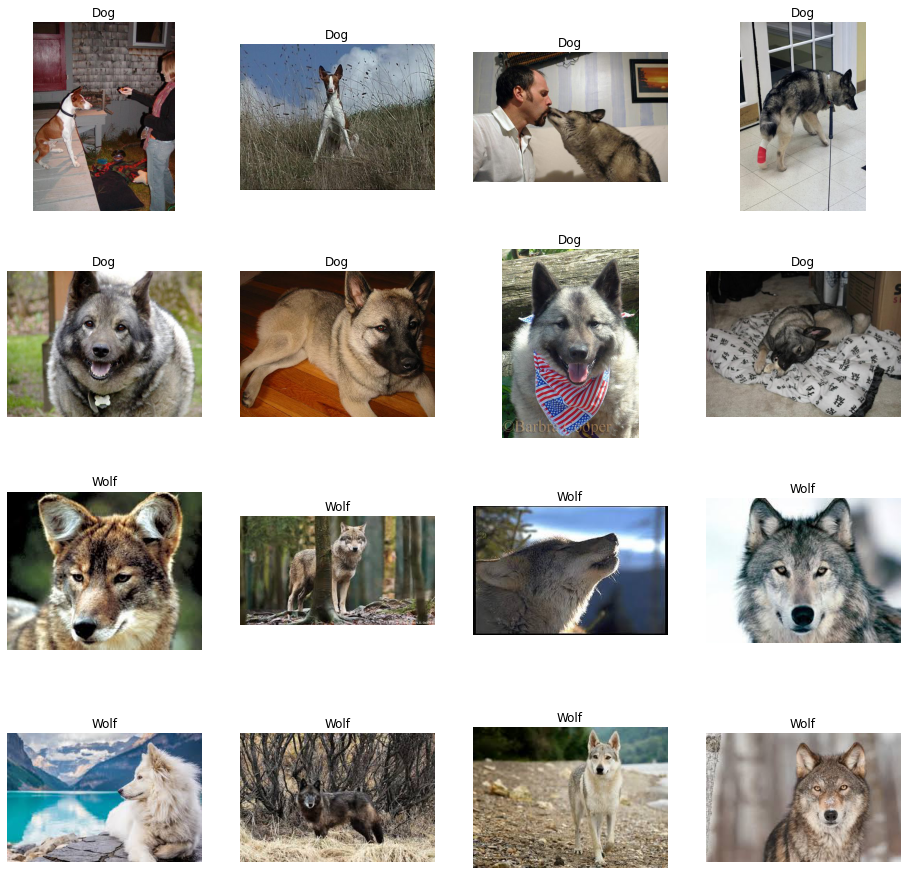

In [8]:
# Specify the directory paths for dogs and wolves
dogs_directory = 'Dataset/Train/dogs'  # Directory path for 'dogs'
wolves_directory = 'Dataset/Train/wolves'  # Directory path for 'wolves'

# Get the list of file names in the directories
dog_filenames = os.listdir(dogs_directory)
wolf_filenames = os.listdir(wolves_directory)

# Check the number of images in each class
num_dogs_train = len(os.listdir(dogs_directory))
num_wolves_train = len(os.listdir(wolves_directory))
print("Number of images in the 'dogs' class in the training dataset:", num_dogs_train)
print("Number of images in the 'wolves' class in the training dataset:", num_wolves_train)

# Set the index to start displaying images
start_index = 210

# Create lists of image file paths to display
dog_images = [os.path.join(dogs_directory, fname) for fname in dog_filenames[start_index - 8:start_index]]
wolf_images = [os.path.join(wolves_directory, fname) for fname in wolf_filenames[start_index - 8:start_index]]

# Create a 4x4 grid to display images
plt.figure(figsize=(16, 16))

# Display dog images
for i, dog_image_path in enumerate(dog_images):
    subplot = plt.subplot(4, 4, i + 1)
    subplot.axis('off')
    img = mpimg.imread(dog_image_path)
    plt.imshow(img)
    plt.title('Dog')

# Display wolf images
for i, wolf_image_path in enumerate(wolf_images):
    subplot = plt.subplot(4, 4, i + 9)  # Start from the 9th subplot
    subplot.axis('off')
    img = mpimg.imread(wolf_image_path)
    plt.imshow(img)
    plt.title('Wolf')

plt.show()

In [9]:
# Define the image size and batch size for the dataset
image_size = (200, 200)
batch_size = 32

# Create the training dataset using TensorFlow's image_dataset_from_directory
train_dataset = image_dataset_from_directory(
    directory=os.path.join(base_dir, 'Train'),
    labels='inferred',
    label_mode='binary',  # Binary classification
    validation_split=0.1,
    subset='training',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True  # Shuffle the data for better training
)

# Create the validation dataset with similar improvements
validation_dataset = image_dataset_from_directory(
    directory=os.path.join(base_dir, 'Train'),
    labels='inferred',
    label_mode='binary',
    validation_split=0.1,
    subset='validation',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False  # No need to shuffle validation data
)

Found 940 files belonging to 2 classes.
Using 846 files for training.
Found 940 files belonging to 2 classes.
Using 94 files for validation.


In [10]:
# Print the shape of the data
print("Training Dataset Shape:", train_dataset.element_spec)
print("Validation Dataset Shape:", validation_dataset.element_spec)

# Check the number of images in each class
num_dogs_train = len(os.listdir(dogs_directory))
num_wolves_train = len(os.listdir(wolves_directory))
print("Number of images in the 'dogs' class in the training dataset:", num_dogs_train)
print("Number of images in the 'wolves' class in the training dataset:", num_wolves_train)

Training Dataset Shape: (TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))
Validation Dataset Shape: (TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))
Number of images in the 'dogs' class in the training dataset: 470
Number of images in the 'wolves' class in the training dataset: 470


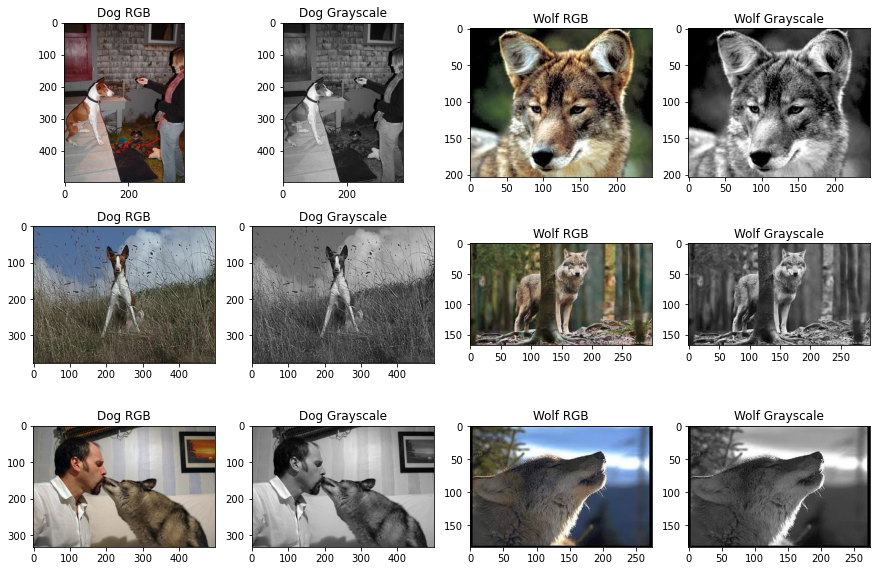

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Function to convert RGB images to grayscale
def rgb_to_gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Display some images
fig, ax = plt.subplots(3, 4, figsize=(15, 10))  # Increased figure size

for i in range(3):  # Assuming there are at least 3 images in both lists
    # Add a dog image
    dog_img = mpimg.imread(dog_images[i])
    gray_dog_img = rgb_to_gray(dog_img)
    ax[i, 0].imshow(dog_img)
    ax[i, 0].set_title('Dog RGB')
    ax[i, 1].imshow(gray_dog_img, cmap=plt.get_cmap('gray'))
    ax[i, 1].set_title('Dog Grayscale')

    # Add a wolf image
    wolf_img = mpimg.imread(wolf_images[i])
    gray_wolf_img = rgb_to_gray(wolf_img)
    ax[i, 2].imshow(wolf_img)
    ax[i, 2].set_title('Wolf RGB')
    ax[i, 3].imshow(gray_wolf_img, cmap=plt.get_cmap('gray'))
    ax[i, 3].set_title('Wolf Grayscale')

plt.show()

In [12]:
# Normalize the data
def normalize(image):
    return image / 255.0

# Reshape train and test images into one-dimensional vectors
def reshape_images(dataset):
    reshaped_data = []
    for images, labels in dataset:
        for image in images:
            reshaped_data.append(image.numpy().ravel())
    return np.array(reshaped_data)

# Normalizing the data
train_dataset = train_dataset.map(lambda x, y: (normalize(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalize(x), y))

# Reshaping the images
train_images = reshape_images(train_dataset)
validation_images = reshape_images(validation_dataset)

# Confirm the shapes of the data
print("Shape of the training images:", train_images.shape)
print("Shape of the validation images:", validation_images.shape)

Shape of the training images: (846, 120000)
Shape of the validation images: (94, 120000)


In [13]:
from tensorflow.keras import layers

# Create a Sequential model for classification
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')  # Use 1 neuron with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [14]:
!pip install pydot

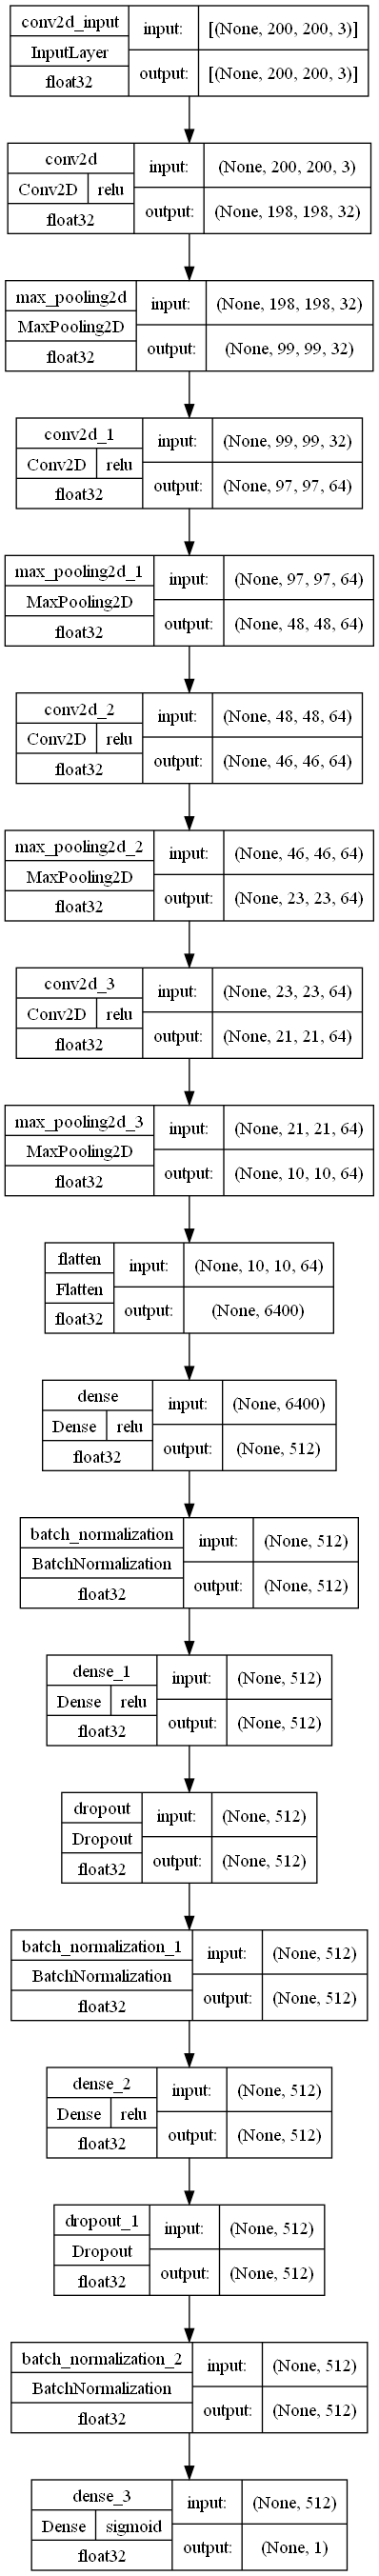

In [15]:
from tensorflow.keras.utils import plot_model

# Visualize the model with show_shapes, show_dtype, and show_layer_activations options
plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)


In [16]:
model.compile(
    loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
    optimizer='adam',  # You can adjust the optimizer as needed
    metrics=['accuracy']  # You can include additional metrics if desired
)

In [17]:
# Fit the model using the improved training and validation datasets
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
27/27 [==============================] - 39s 1s/step - loss: 0.8791 - accuracy: 0.5591 - val_loss: 0.3241 - val_accuracy: 1.0000
Epoch 2/10
27/27 [==============================] - 32s 1s/step - loss: 0.6961 - accuracy: 0.6359 - val_loss: 3.8194 - val_accuracy: 0.0000e+00
Epoch 3/10
27/27 [==============================] - 32s 1s/step - loss: 0.5896 - accuracy: 0.7080 - val_loss: 1.4533 - val_accuracy: 0.0638
Epoch 4/10
27/27 [==============================] - 32s 1s/step - loss: 0.5305 - accuracy: 0.7482 - val_loss: 0.8383 - val_accuracy: 0.3723
Epoch 5/10
27/27 [==============================] - 32s 1s/step - loss: 0.4452 - accuracy: 0.7884 - val_loss: 0.4315 - val_accuracy: 0.8298
Epoch 6/10
27/27 [==============================] - 32s 1s/step - loss: 0.4038 - accuracy: 0.8180 - val_loss: 1.3436 - val_accuracy: 0.3723
Epoch 7/10
27/27 [==============================] - 32s 1s/step - loss: 0.3959 - accuracy: 0.8085 - val_loss: 1.3769 - val_accuracy: 0.4787
Epoch 8/10
27/27

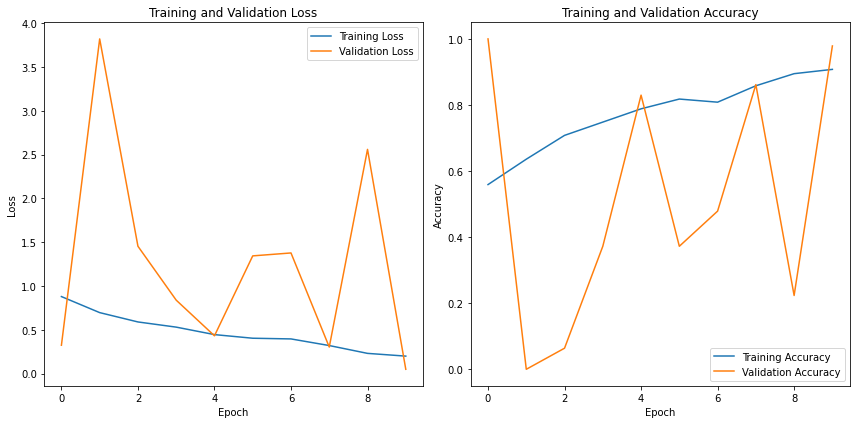

In [18]:
# Create a DataFrame from the history object
history_df = pd.DataFrame(history.history)

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Show the plots
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 35ms/step
It's a Dog


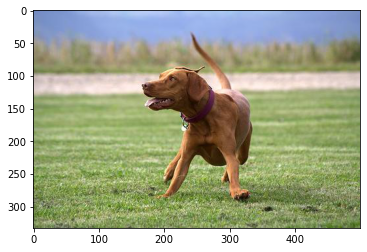

In [36]:
# Load and preprocess the dog image
dog_img_path = 'Dataset/Valid/dogs/n02100583_6740.jpg'  # Provide the correct path to your dog image
img = image.load_img(dog_img_path, target_size=(200, 200))
img = image.img_to_array(img)
img = img / 255.0  # Normalize the image
img = img.reshape((1,) + img.shape)  # Reshape for model input

# Make a prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] >= 0.5:
    print("It's a Dog")
else:
    print("It's a Wolf")

# Display the dog image
plt.imshow(image.load_img(dog_img_path))
plt.show()

1/1 [==============================] - 0s 32ms/step
It's a Wolf


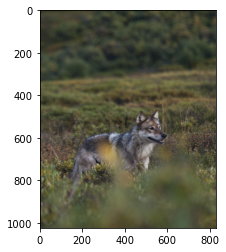

In [34]:
# Load and preprocess the wolf image
wolf_img_path = 'Dataset/Valid/wolves/Img-4175.jpg'
img = image.load_img(wolf_img_path, target_size=(200, 200))
img = image.img_to_array(img)
img = img / 255.0  # Normalize the image
img = img.reshape((1,) + img.shape)  # Reshape for model input

# Make a prediction
prediction = model.predict(img)

# Interpret the prediction
if prediction[0][0] >= 0.5:
    print("It's a Wolf")
else:
    print("It's a Dog")

# Display the wolf image
plt.imshow(image.load_img(wolf_img_path))
plt.show()